# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [31]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [32]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [33]:
data.shape

(5391, 6)

In [34]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [35]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [36]:
data.isna().any()

,0
Rank,False
Release_Date,False
Movie_Title,False
USD_Production_Budget,False
USD_Worldwide_Gross,False
USD_Domestic_Gross,False


In [37]:
duplicated_rows = data[data.duplicated()]

In [38]:
len(duplicated_rows)

0

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [40]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace("$","")
data["USD_Production_Budget"] = data["USD_Production_Budget"].astype(str).str.replace(",","")
data["USD_Production_Budget"] = pd.to_numeric(data["USD_Production_Budget"])

In [41]:
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace("$","")
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].astype(str).str.replace(",","")
data["USD_Worldwide_Gross"] = pd.to_numeric(data["USD_Worldwide_Gross"])

In [42]:
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace("$","")
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].astype(str).str.replace(",","")
data["USD_Domestic_Gross"] = pd.to_numeric(data["USD_Domestic_Gross"])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [43]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [45]:
#1
print(f'{data["USD_Production_Budget"].mean():.2f}')
#2
print(f'{data["USD_Worldwide_Gross"].mean():.2f}')
#3
print(data["USD_Worldwide_Gross"].min())
print(data["USD_Domestic_Gross"].min())

#4
data['Profit'] = data["USD_Worldwide_Gross"] - data["USD_Production_Budget"]
data.sort_values('USD_Worldwide_Gross', ascending = False, inplace=True)
top_25percent = data['Profit'].head(int(len(data)/4))
print((top_25percent > 0).all())
print((top_25percent < 0).any())

#5
print(f'{data["USD_Worldwide_Gross"].max():.2f}')
print(f'{data["USD_Production_Budget"].max():.2f}')

#6
print(f'{data["Profit"].max():.2f}')
print(f'{data["Profit"].min():.2f}')


31113737.58
88855421.96
0
0
False
True
2783918982.00
425000000.00
2358918982.00
-175000000.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [46]:
grossed_nothing = data[["USD_Domestic_Gross","Movie_Title","USD_Production_Budget"]][data["USD_Domestic_Gross"] == 0]
len(grossed_nothing)

512

In [47]:
grossed_nothing.sort_values('USD_Production_Budget', ascending=False).head(5)

,USD_Domestic_Gross,Movie_Title,USD_Production_Budget
5388,0,Singularity,175000000
5387,0,Aquaman,160000000
5384,0,A Wrinkle in Time,103000000
5385,0,Amusement Park,100000000
5090,0,"Don Gato, el inicio de la pandilla",80000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [48]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False).head(5)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000


### Filtering on Multiple Conditions

In [49]:
international_releases=data.loc[
                                (data["USD_Domestic_Gross"] == 0 )
                               & (data["USD_Worldwide_Gross"] != 0)
                               ]
print(len(international_releases))
print(international_releases.head())

155
      Rank Release_Date                             Movie_Title  \
2836  1270   2006-12-31         Les Bronzés 3: amis pour la vie   
4960  3283   2015-08-05                       La famille Bélier   
3809  2154   2010-12-31  Sammy's avonturen: De geheime doorgang   
3769  2776   2010-11-05                                Haeundae   
3051  2665   2007-12-31                                  Taxi 4   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross    Profit  
2836               42000000             83833602                   0  41833602  
4960               11000000             74056184                   0  63056184  
3809               25000000             71594792                   0  46594792  
3769               16000000             64733391                   0  48733391  
3051               17500000             60865364                   0  43365364  


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [50]:
xd = data.query("USD_Domestic_Gross == 0  and USD_Worldwide_Gross != 0")
len(xd)

155

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [51]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [52]:
filtered_data = data[data['Release_Date'] >= scrape_date]
len(filtered_data)

7

In [53]:
len(data)

5391

In [58]:
data_clean = data.drop(filtered_data.index)


In [59]:
len(data_clean)

5384

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [60]:
print(f"{len(data_clean[data_clean['Profit'] < 0]) / len(data_clean) * 100:.2f}%")

37.28%


# Seaborn for Data Viz: Bubble Charts

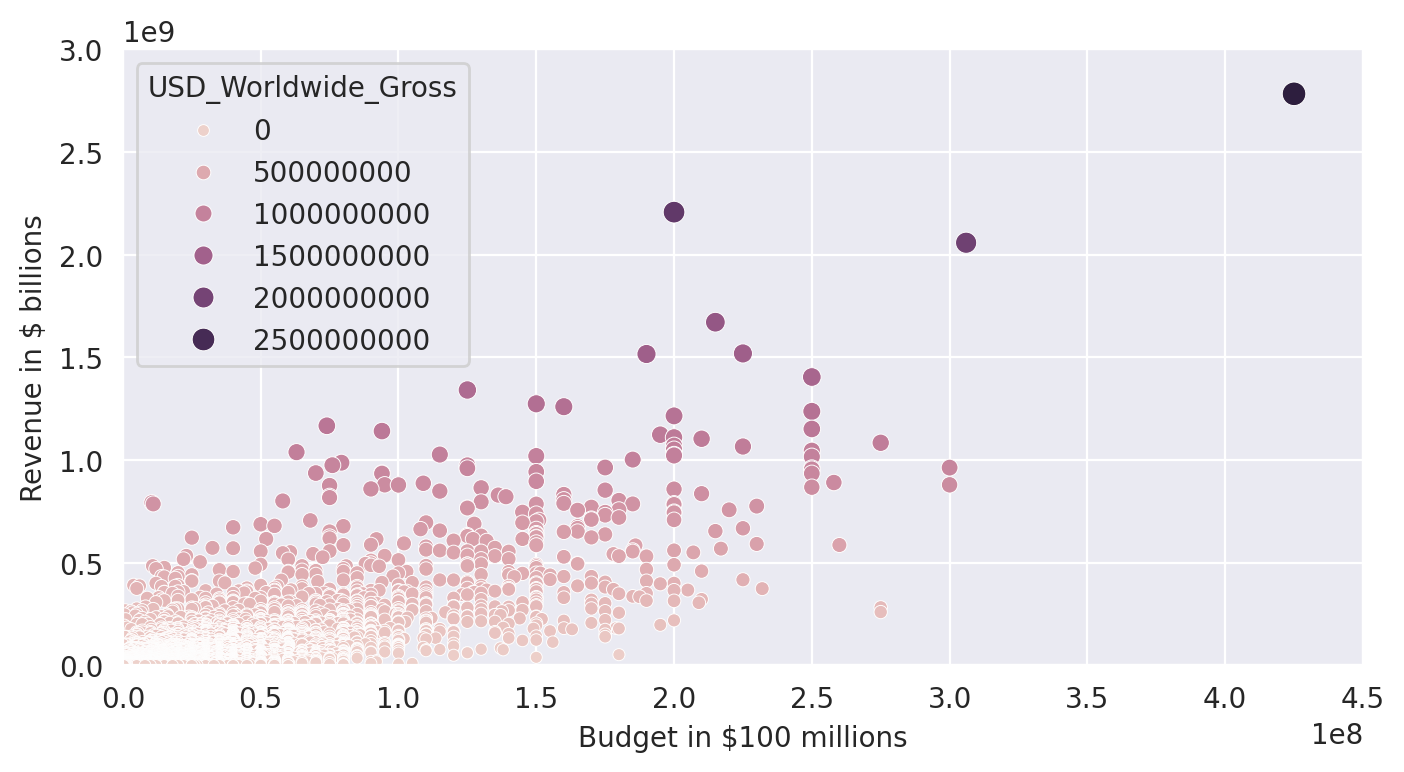

In [65]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='USD_Production_Budget',
                      y="USD_Worldwide_Gross",
                      hue = 'USD_Worldwide_Gross',
                      size = 'USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time



In [66]:
data_clean.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross', 'Profit'],
      dtype='object')

[(0.0, 450000000.0),
 (-19876.0, 17531.0),
 Text(0, 0.5, 'Budget in $100 millions'),
 Text(0.5, 0, 'Year')]

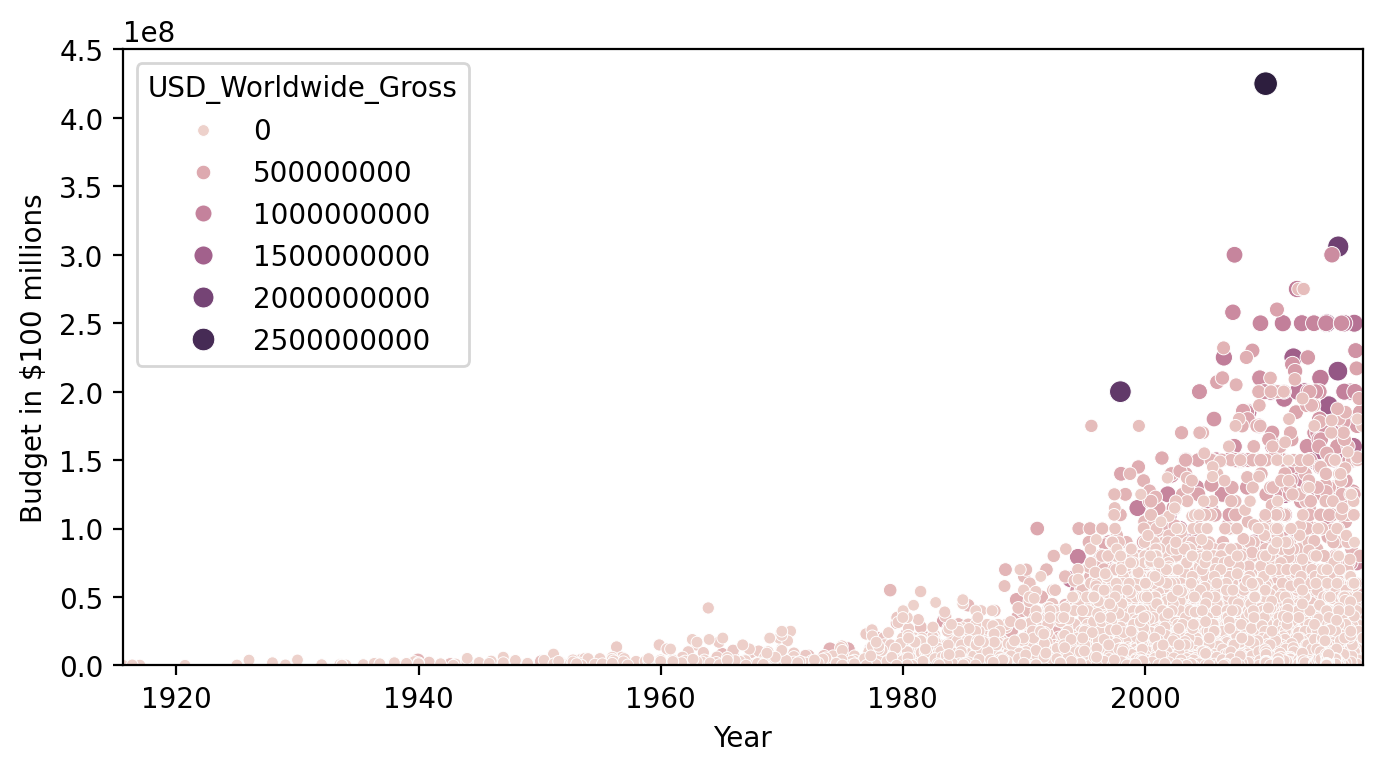

In [84]:

plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data= data_clean,
                     x="Release_Date",
                     y="USD_Production_Budget",
                     hue="USD_Worldwide_Gross",
                     size = "USD_Worldwide_Gross")
ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylabel='Budget in $100 millions',
        xlabel='Year')

# Converting Years to Decades Trick

In [91]:
dt_index = pd.DatetimeIndex(data_clean["Release_Date"])
years = dt_index.year

data_clean["Decade"] = (years//10)*10

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [93]:
threshold = pd.Timestamp('1969-12-31')
old_films = data_clean[data_clean["Release_Date"] <= threshold]

In [95]:
len(old_films)

153

In [96]:
new_films = data_clean.drop(old_films.index)

In [98]:
len(new_films)

5231

# Seaborn Regression Plots

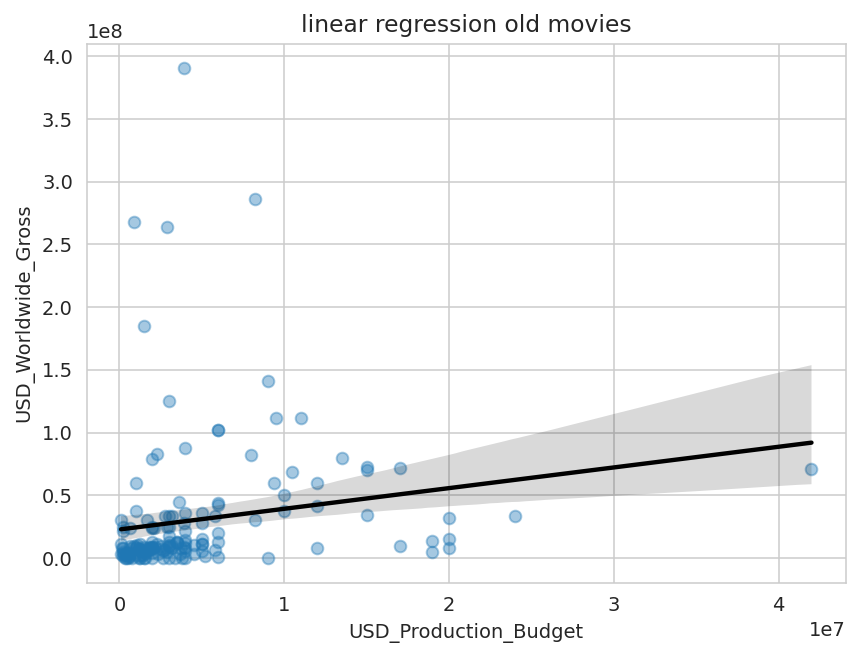

In [111]:
plt.figure(figsize=(7,5), dpi=140)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'}).set(title="linear regression old movies")

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

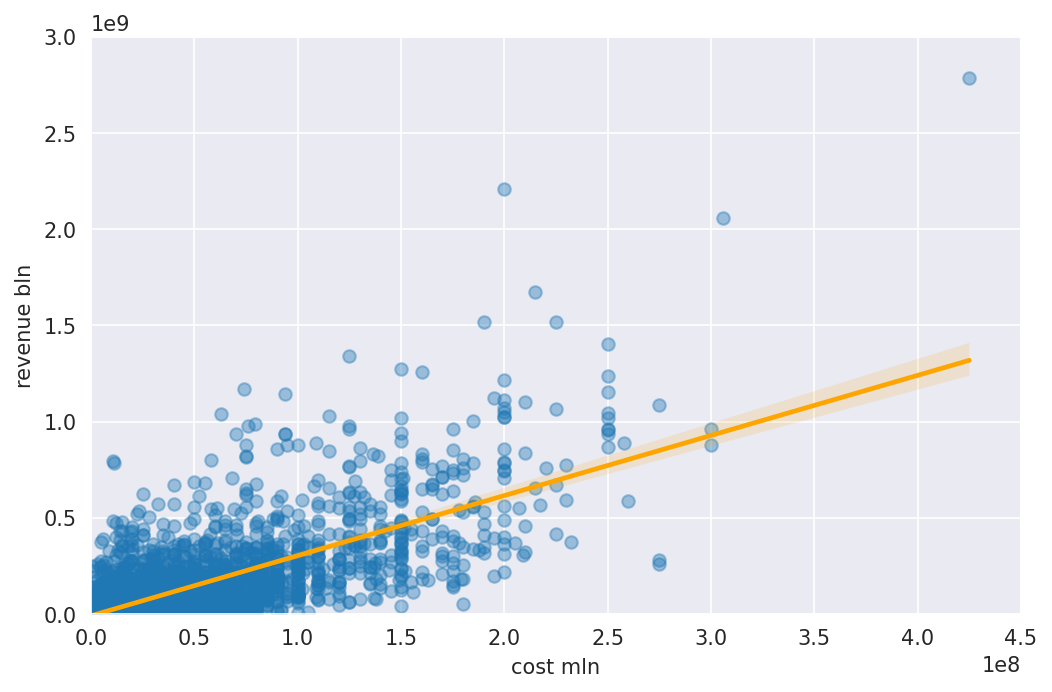

In [120]:
plt.figure(figsize = (8,5), dpi=150)

with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'orange'})
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
        ylabel='revenue bln',
        xlabel='cost mln')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [123]:
regression = LinearRegression()

In [124]:
#explanatory variables ( features )
X = pd.DataFrame(new_films, columns = ["USD_Production_Budget"])

#response variable ( target )
y = pd.DataFrame(new_films, columns = ["USD_Worldwide_Gross"])

In [125]:
regression.fit(X, y)

LinearRegression()

In [126]:
regression.intercept_

array([-8650768.0066102])

In [127]:
regression.coef_

array([[3.12259592]])

In [128]:
regression.score(X, y) # explains how much of variance model explains

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [129]:
regression_old = LinearRegression()

In [130]:
#explanatory variable ( feature )
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

#response variable ( target )
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

In [131]:
regression_old.fit(X, y)

LinearRegression()

In [132]:
regression_old.intercept_

array([22821538.63508039])

In [133]:
regression_old.coef_

array([[1.64771314]])

In [134]:
regression_old.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?